
# Project: Investigate a No-show Appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
> use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. 

In [3]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>  load in the data, check for cleanliness, and then trim and clean your dataset for analysis

In [4]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [5]:
print(df.shape)
df.head()

(110527, 14)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
# change data type of some columns
df['PatientId'] = df['PatientId'].astype('int64')
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay'])

we note that there are no missing data in our dataset as each and every column has 110527 rows.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  int64              
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [5]:
def wrangle():
    df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
    
    #we drop columns patientid ,appointmentid , ScheduledDay
    
    return df

In [9]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


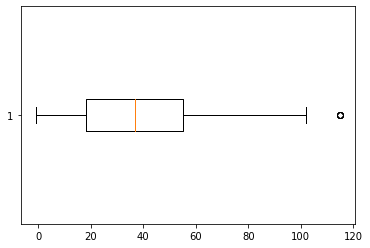

In [19]:
# checking for outliers

plt.boxplot(df["Age"],vert=False);

we note that the Age column has min value of -1 which is therefore an outlier since there cannot be a negative age.And a max value of 115 we can look at the outliers using a boxplot.The dot indicates the outlier whichvis between 100 and 120

### Data Cleaning
> we use the interquatile range to check for outliers and both the upperbound and lower bound.

In [20]:
Q1 = df["Age"].quantile(0.25)
Q2 = df["Age"].quantile(0.75)
Q3 = Q2 - Q1
def outliers(upper_quatile,lower_quatile):
    upper_quatile = Q2 + 1.5*Q3
    lower_quatile = Q2 - 1.5*Q3
    return upper_quatile,lower_quatile

ans,ans2 = outliers(df["Age"],df["Age"])
print(ans,ans2)

110.5 -0.5


In [21]:
mask_age=df["Age"] < 111.5
mask_ageb = df["Age"] > 0.5
df=df[mask_age & mask_ageb]
df["Age"].describe()

count    106982.000000
mean         38.312501
std          22.460622
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         102.000000
Name: Age, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis
 Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section


# do patients book appointment again?
we note that the Age column has min value of -1 which is therefore an outlier since there cannot be a negative age.And a max value of 115 we can look at the outliers using a boxplot.

In [22]:
#check if ther's any duplicate in patientid
df["PatientId"].duplicated().sum()

46714

we observe that 48228 patients go for appointmnets again

# Number of appointments based on the age?

In [35]:
df.groupby('No-show')['Age'].mean()

No-show
No     37.790064
Yes    34.317667
Name: Age, dtype: float64

In [38]:
age_noshow = pd.crosstab(index = df['Age'],
                        columns = df['No-show'], normalize = 'index')
age_noshow.head()

No-show,No,Yes
Age,,
1,0.817422,0.182578
2,0.844252,0.155748
3,0.816920,0.183080
4,0.782910,0.217090
5,0.785091,0.214909


# number of appointments for male and for females?


In [11]:
# Analysing classsification features?
df["Gender"].value_counts()

F    70113
M    36869
Name: Gender, dtype: int64

In [22]:
#replace label, just for make it clear
replacement_gender = { 'F': 'Female', 
              'M': 'Male'}
df['Gender'].replace(replacement_gender, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


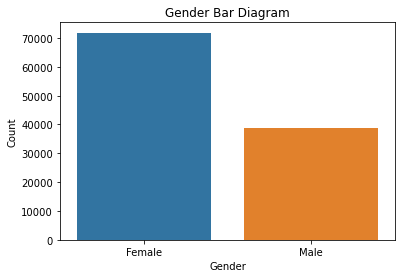

In [24]:
# plot of Gender
sns.countplot(df['Gender']);
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Bar Diagram');

# number of appointments for people with hipertension and those without?

In [25]:
df["Hipertension"].value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

# number of appointment for those who Scholarship compared to those whodidnot?

In [26]:
df["Scholarship"].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

# numberof appointment for those with Alcoholism compared to those without?

In [27]:
df["Alcoholism"].value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

# number of appointment for those who received_SMS compared to those whodidnot

In [28]:
df["SMS_received"].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

# which neighbourhood has the highest number of appointments?

In [29]:
df["Neighbourhood"].nunique()

81

In [30]:
df["Neighbourhood"].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [39]:
neighbor = pd.crosstab(index=df["Neighbourhood"], 
            columns=df["No-show"])
neighbor_sort = neighbor.sort_values('Yes', ascending= False)

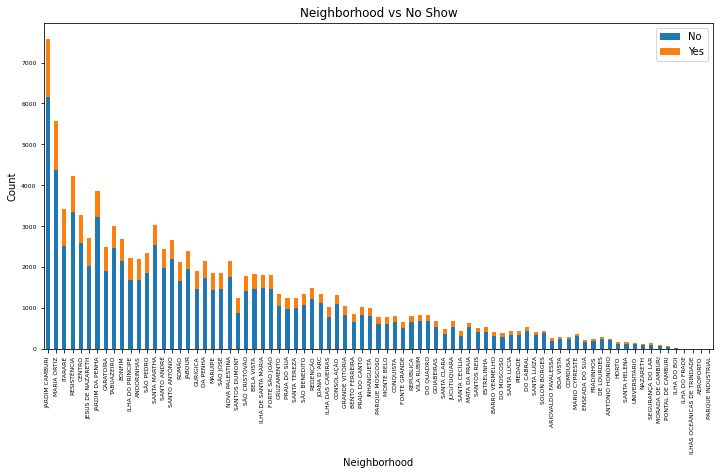

In [40]:
neighbor_sort.plot(kind='bar',figsize = (12,6), fontsize = 6,
                                     stacked = True)

plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.title('Neighborhood vs No Show')

plt.legend();

# Data visualization 

In [33]:
column_plot = ['Scholarship', 
               'Hipertension',
               'Diabetes', 
               'Alcoholism', 
               'Handcap', 
               'SMS_received']

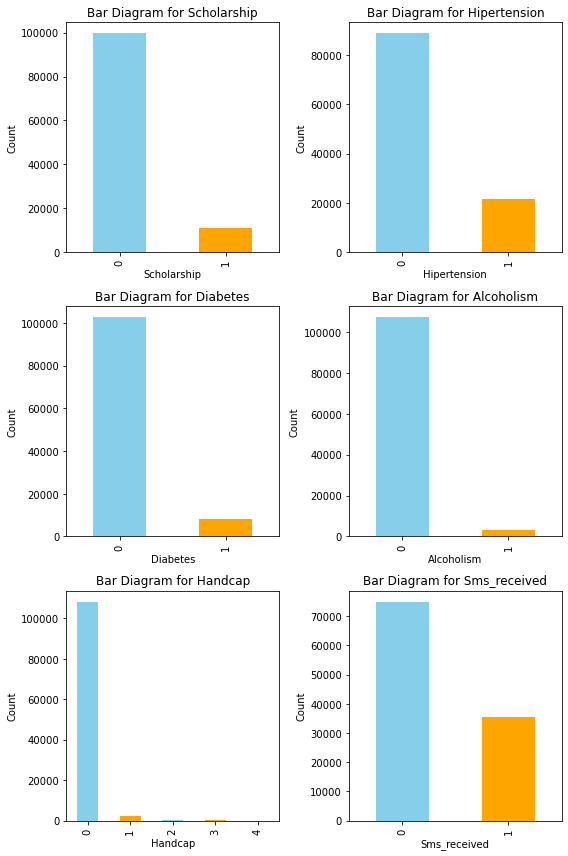

In [34]:
# count patient number in each group
fig = plt.figure(figsize= (8,12))
for number, column in enumerate(column_plot):
    axes = fig.add_subplot(3,2, number+1)
    axes.set_xlabel(column.capitalize())
    axes.set_title('Bar Diagram for ' + column.capitalize())
    df[column].value_counts().plot(kind = 'bar', ax = axes, color = ['skyblue', 'orange'])
    plt.ylabel('Count')
plt.tight_layout()

# data visualization

In [41]:
df.drop(columns=["AppointmentID","ScheduledDay","AppointmentDay","PatientId"],inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106982 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Gender         106982 non-null  object
 1   Age            106982 non-null  int64 
 2   Neighbourhood  106982 non-null  object
 3   Scholarship    106982 non-null  int64 
 4   Hipertension   106982 non-null  int64 
 5   Diabetes       106982 non-null  int64 
 6   Alcoholism     106982 non-null  int64 
 7   Handcap        106982 non-null  int64 
 8   SMS_received   106982 non-null  int64 
 9   No-show        106982 non-null  object
dtypes: int64(7), object(3)
memory usage: 9.0+ MB


### what is the correlation between the values?

In [43]:
corr=df.corr()
corr

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
Age,1.000000,-0.112677,0.502241,0.290756,0.090444,0.073387,0.005295
Scholarship,-0.112677,1.000000,-0.024530,-0.027627,0.033524,-0.009823,-0.000014
Hipertension,0.502241,-0.024530,1.000000,0.430837,0.085461,0.078378,-0.008845
Diabetes,0.290756,-0.027627,0.430837,1.000000,0.016871,0.056478,-0.016140
Alcoholism,0.090444,0.033524,0.085461,0.016871,1.000000,0.003897,-0.027406
Handcap,0.073387,-0.009823,0.078378,0.056478,0.003897,1.000000,-0.025016
SMS_received,0.005295,-0.000014,-0.008845,-0.016140,-0.027406,-0.025016,1.000000


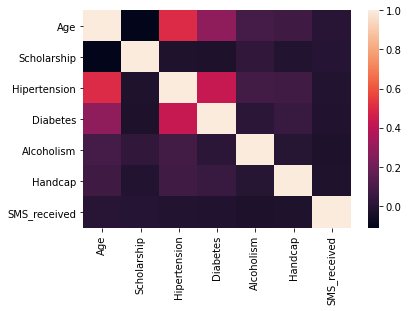

In [44]:
sns.heatmap(corr);

<a id='conclusions'></a>
## Conclusions

>Finally,we summarize our findings and the results that have been performed in relation to the question(s) provided that there's a strong relation ship between age hypertension and diabetes.